# Statistics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import random as rd

## Summary Statistics

N: Total Population

n: Sample size

M: Successes in Population

x: Successes in Sample

### Central Tendencies

In [3]:
pokemon_df=pd.read_csv('./data/pokemon_data.csv')

#using Numpy/Scipy to calc central tendencies of population
print(np.mean(pokemon_df['HP'])) # mean
print(np.median(pokemon_df['HP'])) # median
print(stats.mode(pokemon_df['HP'])[0]) #mode, returns array

69.25875
65.0
[60]


In [4]:
pokemon_df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### Variability

In [5]:
print(np.var(pokemon_df['HP'])) #Variance
print(np.std(pokemon_df['HP'] )) # Standard Deviation
print(stats.iqr(pokemon_df['HP'])) #IQR
print(stats.median_abs_deviation(pokemon_df['HP'])) #MAD
print(np.percentile(pokemon_df['HP'],75)) #percentile calc

651.2042984374999
25.518704873827353
30.0
15.0
80.0


### Correlation

#### Covariance 

Measures a relationship between two variables. Output of greater than 0 is a positive relationship. 0 represents independence. Less than 0 is a negative relationship. However, the magnitude of the output is arbitrary and does not represent the strength of the relationship. That is what the correlation coeffecient is for.

<img src="img/covariance_formula.svg" alt="Covariance Formulat" width="500"  style="float:left"/>

In [6]:
np.cov(pokemon_df['HP'],pokemon_df['Attack'])

array([[ 652.01932259,  350.0685122 ],
       [ 350.0685122 , 1053.48059919]])

#### Correlation

This is what is used to measure the strength of a relationship.

<img src="img/correlation_coefficient_formula.svg" alt="Correlation Formula" width="500"  style="float:left"/>

In [7]:
# Linear relationship between two variables
# How much variability in y can be explained by x
# returns r value [0] and two tailed p-value [1]

stats.pearsonr(pokemon_df['HP'],pokemon_df['Attack'])

(0.4223860287762231, 5.8889743583107866e-36)

<AxesSubplot:>

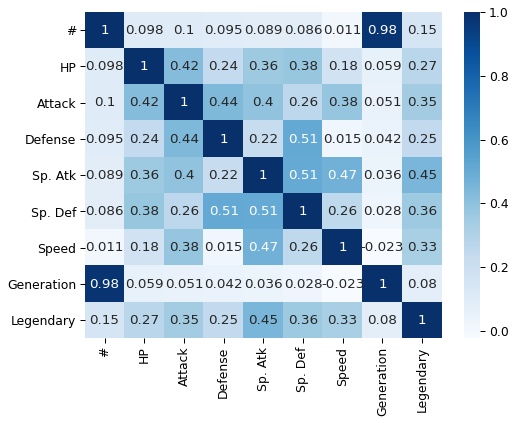

In [8]:
# Can use seaborn to make correlation matrices
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)

# creating a correlation matrix
poke_mx=pokemon_df.corr()

# making it heat map
sns.heatmap(poke_mx, annot=True, cmap='Blues')

# Note HP and Attack have a value of 0.42 which calced above

## Data and Sampling Distributions

### Getting a sample

In [9]:
# random_state is just the seed
# generally best practice to always replace = True, can be ignored occassionally if sample is >10% of population
sample=pokemon_df.sample(n=80, random_state=5, replace = True)

## Sampling Distributions and Standard Errors

The sampling distribution is the distribution of all theoretical samples that could be taken from a population. In other words, it effectively represents all outcomes that could occur from a sample. 

The Central Limit Theorem states that regardless of the populations distribution, that for a summary statistic applied to a random sample, the sampling distribution of this summary statistic will approximate a normal distribution. This is a powerful statement. As it means that, for example, when average a randomly selected sample, you can tell that the average (mean) that you've calculated falls on a normal distribution that is centered around the true mean of the population. Obviously, the larger the sample closer the sampling distribution will approximate the true value.

Text(0.5, 1.0, 'Sampling Distribution of a Summary Statistic')

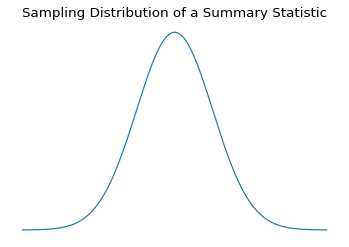

In [10]:
x_axis = np.arange(-4, 4, 0.001)
# Mean = 0, SD = 1
plt.plot(x_axis, stats.norm.pdf(x_axis,0,1))
plt.axis('Off')
plt.title('Sampling Distribution of a Summary Statistic')

The standard deviation of the sampling distribution is known as the standard error. This can be used to measure the accuracy of the summary statistic applied to a sample. Better yet, you don't need to know the sampling distribution to calculate this, as we can approximate it's value from the sample. This is because determinig the true sampling distribution is often incredibly resource consuming, if not down-right impossible.

<img src="img/standard_error.svg" alt="standad error" width="100"  style="float:left"/>

Where the numerator, theta, is equal to the sample's standard deviation, which is defined as follows. Note that we use N-1 instead of simply N. The intuitive explanation is that the "normal" standard deviation calculated from the sample as an estimate of the standard deviation of the population from which the sample was drawn. Because the observed values fall, on average, closer to the sample mean than to the population mean, the standard deviation which is calculated using deviations from the sample mean underestimates the desired standard deviation of the population. Using n−1 instead of n as the divisor corrects for that by making the result a little bit bigger.

<img src="img/sample_standard_deviation.svg" alt="sample standard deviation" width="400"  style="float:left"/>

In [11]:
# If you want to look at the standard error of the mean (which is by far the most common), use the following:
print(f"The standard error of our sample is {stats.sem(sample['HP'])}")

The standard error of our sample is 2.205767307436793


The standard error values are incredibly useful when looking at confidence intervals. See below

### Boot Strapping

The purpose of bootstrapping is to create a approximated view of the sampling distribution. From there, you can determine approximations of the standard, calculate confidence intervals, perform hypothesis testing, and just get a general sense for the data. The process of boot-strapping is to effectively generate an arbitrarily large number of pseudo-samples from the original sample you drew to begin with. This is done by resampling with replacement from your original sample, n number of times, to create new samples. 

In [12]:
# Bootstrapping by hand, effectively created an infinite number of pseudo-samples from the original sample
# calcing the mean of HP 

# Bootstrapping 1,000 hypothetical samples 
sample_means=[]

for n in range(1000):
    iter_mean=[]
    for m in range(80):
        iter_sample=sample.sample(n=1, replace=True)
        iter_mean.append(iter_sample['HP'])
    
    sample_means.append(np.mean(iter_mean))


Sampling Interval Mean: 68.57536249999998
Sampling Interval Std. Error.: 2.2431961070855464


Text(0.5, 1.0, 'Boot Strapped Sampling Distribution of Mean Pokemon HP and True Population Mean')

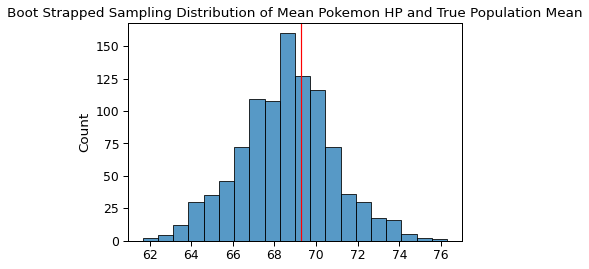

In [13]:
#plotting the hist of the mean HP of all 1,000 bootstrapped samples
true_mean=np.mean(pokemon_df['HP'])

print('Sampling Interval Mean: {}'.format(str(np.mean(sample_means))))
print('Sampling Interval Std. Error.: {}'.format(str(np.std(sample_means))))
sns.histplot(sample_means, bins=20)
plt.axvline(true_mean, color='red')
plt.title('Boot Strapped Sampling Distribution of Mean Pokemon HP and True Population Mean')

#Note that the true population mean is well within 3 standard deviations, this is relevant to confidence intervals 

### Confidence Intervals 

Effectively, all a confidence interval is doing is putting fences up around the mean to say that these fences should capture the "true" mean X% of the time. That confidence value of X expands the fences. To determine the fences, all we're doing is measuring out a few standard errors (remember, the higher the confidence the more standard errors) on either side of the sample statistic to generate this.

In [14]:
# Confidence intervals establish with what confidence have we captured a true populations statistic, given a sampling model
# This uses a student t distribtuion
# First parameter is confidence, second is degrees of freedom, third is sample mean, and last is standard error 

interval=stats.t.interval( 0.95, len(sample['HP'])-1, loc=np.mean(sample['HP']), scale=stats.sem(sample['HP']))

print('Scipy calculates our confidence interval as {} to {}'.format(interval[0], interval[1]))
# To demonstrate this point, I'll add two sample standard errors on either side of the mean of the sample
lower_bound=np.mean(sample['HP'])-(2*stats.sem(sample['HP']))
upper_bound=np.mean(sample['HP'])+(2*stats.sem(sample['HP']))

print('Our manually constructed confidence interval is {} to {}'.format(lower_bound, upper_bound))

boot_lower_bound=np.mean(sample['HP'])-(2*np.std(sample_means))
boot_upper_bound=np.mean(sample['HP'])+(2*np.std(sample_means))

print('Our boot-strapped confidence interval is {} to {}'.format(boot_lower_bound, boot_upper_bound))

Scipy calculates our confidence interval as 64.19702999972478 to 72.97797000027523
Our manually constructed confidence interval is 64.17596538512642 to 72.9990346148736
Our boot-strapped confidence interval is 64.10110778582892 to 73.0738922141711


Sampling Interval Mean: 68.57536249999998
Sampling Interval Std. Dev.: 2.2431961070855464



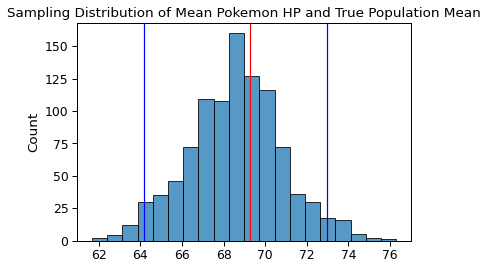

In [15]:
# plotting confidence interval over sampling distribution
true_mean=np.mean(pokemon_df['HP'])

print('Sampling Interval Mean: {}'.format(str(np.mean(sample_means))))

# The below is effecitvely approximating the standard error of the sampling statistic
# See how it's almost identical to the above 3.4789, note that this can be done with other summary stats 
print('Sampling Interval Std. Dev.: {}'.format(str(np.std(sample_means))))


sns.histplot(sample_means, bins=20)
plt.axvline(true_mean, color='red') # True population mean
plt.axvline(interval[0], color='blue') #lower bound of interval
plt.axvline(interval[1], color='blue') #upper bound of interval
plt.title('Sampling Distribution of Mean Pokemon HP and True Population Mean')
print('')

# We've successfully captured the true population mean in this instance, 

### Normal Distribution

Text(0.5, 1.0, 'Normal Distribution')

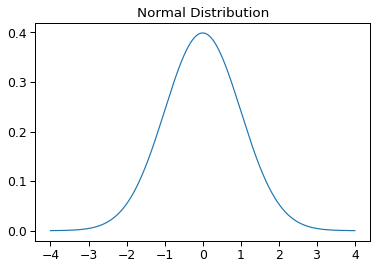

In [16]:
# Recall the central limit theorem, the larger the sample size, the closer the sampling distribution will approximate this
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-4, 4, 0.001)
# Mean = 0, SD = 1
plt.plot(x_axis, stats.norm.pdf(x_axis,0,1))
plt.title('Normal Distribution')

### Other Distributions

Text(0.5, 1.0, 'T Distribution')

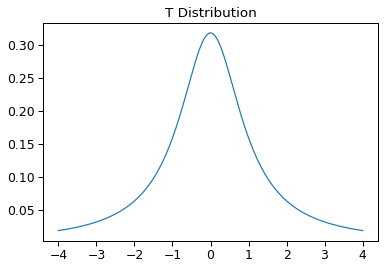

In [17]:
# Student-T Model
# has longer tails, more for smaller sample sizes or for when the population variance is unknown

x_axis = np.arange(-4, 4, 0.001)
# Mean = 0, SD = 1
plt.plot(x_axis, stats.t.pdf(x_axis,1))
plt.title('T Distribution')

Text(0.5, 1.0, 'Binomial Distribution')

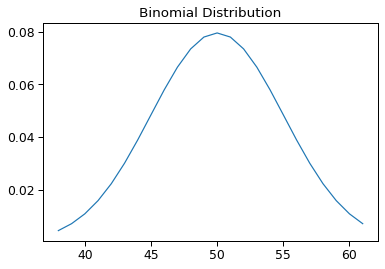

In [18]:
# Binomial Distribution
# Used to simulate a series of bernoulli trials (e.g. Yes/No Random events)
# n is the number of bernoulli trials and p is the probability of success for each trial 
x = np.arange(stats.binom.ppf(0.01, n=100, p=.5),
              stats.binom.ppf(0.99, n=100, p=.5))
# Mean = 0, SD = 1
plt.plot(x, stats.binom.pmf(x ,n=100,p=.5))
plt.title('Binomial Distribution')

## Statistical Experiments and Significance Testing

So you have a sample, and you can calulate some basic things about your sample. So, now what? Well now you can perform tests on you sample. Follow the below flowchart to determine what you should be doing. This section is dedicated to testing. However, the regression portion of the following flowchart is addressed in the model_walkthrough.ipynb.

<img src="img/test_flowchart.png" alt="Testing Flow Chart" width="700"  style="float:left"/>

### A/B Testing

Used to test the efficacy of some sort of a treatment, A or B. It starts by randomly allocating a sample in to two groups, on group who is given a treatment and the control. You then monitor the efficacy of the treatment group and compare it to the control group.

For this example, we'll assume we have some form of treatment that claims to have a chance of converting a normal Pokemon to a Legendary Pokemon. No Pokemon were harmed in this evaluation.


In [19]:
# Setting some base parameters
sample_size=100
alpha=.20
no_of_trials=5000

# treatment efficacy; in reality, you wouldn't know this, but this treatment has 7% chance of upgrading to a legendary
p=.10

# Generating a sample and apply treatment
population=pokemon_df[['Name','Legendary']]

control=population.sample(n=sample_size, replace=True, random_state=50)
treatment=population.sample(n=sample_size, replace=True, random_state=50)

# applying treatment
for i, row in treatment.iterrows():
    if row[1]==False:
        treatment.at[i,'Legendary']=np.random.choice([True, False], p=[p, 1-p])

#Conversion rates
control_perc=np.sum(control['Legendary'])/sample_size
treatment_perc=np.sum(treatment['Legendary'])/sample_size


print('''Proportion of Legendary in control: {}
Proportion of Legendary in treatment: {}'''.format(control_perc, treatment_perc))


Proportion of Legendary in control: 0.13
Proportion of Legendary in treatment: 0.19


In [20]:
# Permutation Test
# Now that we have two samples, both control and treatement, we're going to 
# bootstrap a sampling distribution representing the differnce in the proportion of legendary Pokemon

bootstrap=[]
combined_samples=pd.concat([control, treatment], ignore_index=True)

for n in range(no_of_trials):
    iter_control=combined_samples.sample(n=sample_size, replace=True)
    iter_treatment=combined_samples.sample(n=sample_size, replace=True)
    
    perc_diff=(np.sum(iter_treatment['Legendary'])/sample_size)-(np.sum(iter_control['Legendary'])/sample_size)
    bootstrap.append(perc_diff)


P-value: 0.146
Reject Null-Hypothesis; Treatment is effective.


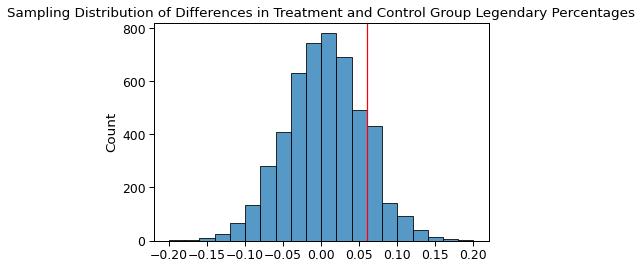

In [21]:
# Now let's plot the bootstrap to demonstrate how likely it was we saw the treatment proportion

sns.histplot(bootstrap, bins=20)
plt.axvline((treatment_perc-control_perc), color='red') # difference we observed in the treatment vs control
plt.title('Sampling Distribution of Differences in Treatment and Control Group Legendary Percentages')

# Since this is a permutation test, we can derive a p-value by looking at our bootstrap population
success_bootstrap=[x for x in bootstrap if x>=(treatment_perc-control_perc)]

p_value=len(success_bootstrap)/no_of_trials

print('P-value: {}'.format(p_value))
if p_value>alpha:
    print('Accept Null-Hypothesis; Treatment is ineffective.')
else:
    print('Reject Null-Hypothesis; Treatment is effective.')

Of course, as this is Python, there are simpler ways to calculate the p-value. In this case, we'll use a T-test to recalculate the difference between groups A and B above, the treatment and control.

In [22]:
# In this case we'll be doing a 
test=stats.ttest_ind(control['Legendary'],treatment['Legendary'])

t_test_p_value=test[1]

print('T-Test P-Value of our Samples: {}'.format(t_test_p_value))

# With that p-value from the t-test, it is pretty close to our p-value from the permuation test

T-Test P-Value of our Samples: 0.249339835590857


### T-Tests

T-Tests are useful for comparing samples to some sort of understood population summary statistic or comparing samples to one another. Furthermore, T-tests are great as they generally allow for smaller sample sizes and you don't need to know the population variance. 

#### One Sample T-Test

In this instance, you're comparing a sample to some sort of "known" metric. A classic example is toxicity levels in tap water. Let's say that the EPA recommends a 0.05 mg/L or below for safe potable water thresholds. You take a few samples of your water and want statistical evidence that the levels of selenium are either safe or unsafe.

For our example, let's continue with the pokemon context. Let's say Professor Oak is interested in regions that have high concentrations of pokemon with uncharacteristically high or low defense. You are in a particular region and what to determine if this region of interest to Professor Oak. So you measure the defense of the first 20 pokemon you encounter (assumed random sampling), and calculate a one-sample test. We know that the average population mean defense is about 73. Professor oak wants to be fairly certain is a interesting region, so assume an alpha of .05.

In [23]:
reg_df=pokemon_df.sample(n=20, random_state=10, replace = True)['Defense']

population_mean=73.842500

print('The mean of our sample is {}'.format(np.mean(reg_df)))

The mean of our sample is 75.1


In [24]:
# To calculate the probability that the mean of defense from the observed sample is the same as the greater population
# we do a two-tail test, which means that the mean might significantly higher or lower

stats.ttest_1samp(reg_df, popmean=population_mean)

Ttest_1sampResult(statistic=0.18841921479970247, pvalue=0.8525459311327118)

As you can see, the pvalue is incredibly high. This makes sense as the sample we took was just from the general population, which we would expect to see adhereing closely to the mean. The additional value provdied as "statistic" is the t-value. This indicates if our sample is generally higher than the mean or lower.

Note that if we were interested in doing a one sided t-test, as in if we were interested in seeing if the region we were in was much higher than the average, we would simply take the p-value divided by two. We can do this because the t distribution is symmetric. Additionally, we would have to ensure that the t-stat is positive, in the instance of our sample mean being higher than the overall population, or negative if lower. 

#### Two Sample T-Test

Two sample T-Tests are useful for seeing if two samples are meaningful different. In this instance, the null hypothesis is that both populations have the same mean. There is one thing to keep in mind when doing this, which is whether the samples are paired or unpaired. Paired data points represent the same instance observed at a later time. For example, this would include whether a treatment is effective at reducing blood pressure where you would measure a patient before and after treatments. In this instance, you would subtract each pair to create a sample of the delta between paired points, and then do a 1 sample t-test with null hypothesis of mean=0. 

Unpaired data represents completely independent data. In this instance you would properly use a two-sample t-test. In our context of pokemon, let's say we sample randomly 20 pokemon from 2 different regions. We would like to know whether attack of these two different regions are meaningul different from one another. Let's assume an alpha of .20.

In [55]:
# Creating our two samples 
sample_one_df=pokemon_df.sample(n=20, random_state=10, replace = True)[['Name','Attack']]
sample_one_df['Sample']='One'

sample_two_df=pokemon_df.sample(n=20, random_state=20, replace = True)[['Name','Attack']]
sample_two_df['Sample']='Two'

sample_comp_df=sample_one_df.append(sample_two_df)

Sample One has a mean attack of Attack    77.0
dtype: float64
Sample Two has a mean attack of Attack    83.85
dtype: float64



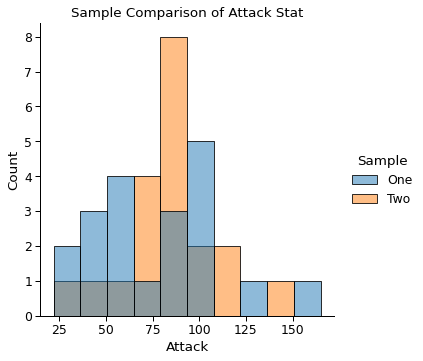

In [56]:
print("Sample One has a mean attack of {}".format(np.mean(sample_one_df)))
print("Sample Two has a mean attack of {}".format(np.mean(sample_two_df)))

# Let's visualize the samples just to get a sense of the difference in means 
sns.displot(sample_comp_df, x='Attack', hue="Sample", bins=10)
plt.title('Sample Comparison of Attack Stat')
print('')

As you can see, they have fairly clos distributions however Sample Two skews slightly higher. So let's call a two-sample t-test to see if we can claim with statistical that this truly is the case.

In [54]:
# What's neat about the ttest_rel is that we can pass whether or not we want a one-sided ttest by passing "less" or "greater" or two-sided by passing just that 
# In this instance, we just wanted to see if they were meaningfully different, so we just passed two-sided.

stats.ttest_rel(a=sample_one_df['Attack'], b=sample_two_df['Attack'], alternative='two-sided')

Ttest_relResult(statistic=-0.9299816385653339, pvalue=0.3640466177922411)

As you can see, the p-value is still higher than our alpha so we conclude these two populations have the same means. Additionally, we see the t-stat is less than 0, which indicates that A (Sample One) has a lower mean that B (Sample Two).

### ANOVA

In [25]:
# Allows for testing multiple treatments. Note, here are the assumptions necessary
#    The samples are independent.
#    Each sample is from a normally distributed population.
#    The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

# efficacy of treatment 2
p_2=.05

treatment_2=population.sample(n=sample_size, replace=True, random_state=50)

for i, row in treatment_2.iterrows():
    if row[1]==False:
        treatment_2.at[i,'Legendary']=np.random.choice([True, False], p=[p_2, 1-p_2])
        
anova=stats.f_oneway(control['Legendary'], treatment['Legendary'], treatment_2['Legendary'])
print(anova)

#The P-Value here represents the probability of null hypothesis (all samples have the same proportion) being true

F_onewayResult(statistic=0.7402315484804632, pvalue=0.4778813822647716)


### Chi Square Tests

Chi-Square Tests are useful for evaluating patterns in the data. Effectively, Chi-Square tests evaluate whether or not our expected pattern is showing up in the data. This can be used for very specific, user-defined patterns, or just for overall independence between categorical variables. In these instances, somewhat counter-intuitively, our null hypothesis is that the data matches our given expectation or pattern.

#### Evaluating Independence

The Chi-Square test is incredibly useful in evaluating whether or not two (or more) categorical variables are independent. This is done by taking the independent row and colum totals to predict what each expected value is. So for our context, we'll see if Type 1 and Type 2 are truly independent, in regard to HP. To cut down on calculations, we'll look at Type 1 Normal and Poison and Type 2 Flying and Grass. Assume an alpha value of 0.05

In this context, we assume independence is (r x c)/g where r is the total row amount, c is the total column amount, and g is the total observations. We apply this as the expected value for each cell

In [181]:
type_mx=pokemon_df.pivot_table(index='Type 1', columns='Type 2', values='HP', aggfunc='count')
type_mx=type_mx.fillna(0)
type_mx

type_mx=type_mx[['Flying','Grass']].iloc[12:14]

Type 2,Flying,Grass
Type 1,,
Normal,24.0,2.0
Poison,3.0,0.0


In [183]:
expected =[((26*27)/29),((26*2)/29),((3*27)/29),((3*2)/29)]
obs=[24,2,3,0]

stats.chisquare(f_obs=obs, f_exp=expected, ddof=1)

Power_divergenceResult(statistic=0.24786324786324787, pvalue=0.8834402449882273)

In this instance, we see that the p-value is still quite high despite the fact that we see substantial variation between the observed categories. We're forced to conclude that the values are independent. However, if we would like to continue exploring this relationship, we would have to conduct more statistical tests.

#### Evaluating Patterns

In our context of pokemon, imagine we're looking at aerial photograph of where our pokemon are being observed. We can count how many pokemon we observe in each square kilometer to determine if we should believe that pokemon are gathering around areas of potential interest. In this instance, we will assume the null hpyothesis is that the pokemon are randomly distributed in each square kilometer. We will observing 9 square kilometeres for the sake of simplicity and we will see 50 in this region. We will also assume an alpha of .05.

Note that we could do any arbitrary pattern as opposed to a random distribution as well.

(0.0, 3.0)

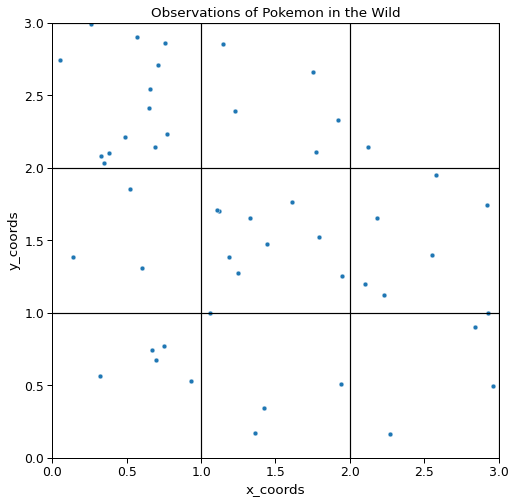

In [162]:
#first we'll have to make some data to represent our pokemon observations
#1289073
rd.seed(1289073)

x=[]
y=[]

for _ in range(50):
    x.append((rd.randrange(0,300)/100))
    y.append((rd.randrange(0,300)/100))
    
geo_obs=pd.DataFrame({'x_coords':x , 'y_coords':y})

# rounding down to show which square they are in for purposes of comparison
geo_obs['x_round']=0
geo_obs['y_round']=0

geo_obs['x_round']=geo_obs['x_coords'].apply(lambda x: int(x))
geo_obs['y_round']=geo_obs['y_coords'].apply(lambda y: int(y))

# Let's plot the distribution as well just to visualize

plt.figure(figsize=(8,8))
sns.scatterplot(data=geo_obs, x='x_coords', y='y_coords')
plt.title('Observations of Pokemon in the Wild')

for x in range(0,3):
    plt.axvline((x+1), color='black')
    plt.axhline((x+1), color='black')
    
plt.xlim(0,3)
plt.ylim(0,3)

It looks like there might be a slight preference by observed Pokemon to be towards the left, or if we assume northern orientation, towards the west. Additionally, we're seeing almost no pokemon in the northeast. However, we should check that the distribution we're seeing is truly what not just random distribution.

In [163]:
# First let's count the number of observations per quadrant

count_pd=geo_obs.groupby(['x_round','y_round']).agg({'x_coords':'count'})
count_pd=count_pd.reset_index()

count_list=count_pd['x_coords'].values.tolist()

# now let's establish our expectations
observations=50
quadrants=9

exp=[]
for _ in range(0,9):
    exp.append(int(50/9))

In [164]:
stats.chisquare(f_obs=count_list, f_exp=exp)

Power_divergenceResult(statistic=24.2, pvalue=0.0021213165966357784)

Uh-oh looks like we got a p-value below our alpha of 0.5. So in this instance, we would assume there is a tendency of the animals distribution that is not truly random. However, because we defined their distribution, we know that distribution was determined randomly. In this instance, we're getting an error. Specifically, a Type 1 Error.

### Errors

I'll take a quick moment to discuss error types. Errors are bound to occur when practicing statistics. Remember, the interpretation of the alpha is the threshold of random chance we consider too low to be mere chance. In other words, we observe over a one-in-X chance of our sample occurring, it's likely we didn't just get lucky. However, sometimes we do get lucky (or unlucky). 

There are two types of errors. The first being we accidently assume something interesting is happening when in reality it is not. The second is when we ignore the interesting findings when in reality we shouldn't have. Note these are merely loose explanations of the practical application, these errors are purely based of the P-value and the established alpha. There is a handy chart below we can use to determine the type of error we get. We must always consider that perhaps we had arrived at an error. In the above example, we arrived at a Type I error. Additional testing can help increase our assurance that we are concluding correctly.

In [171]:
errors=pd.DataFrame({'Conclusion':['Accept Alternative Hypothesis (Reject Null)','Accept Null Hypothesis (Reject Alternative)'],
                     'Null Hypothesis is True (Reject Alternative)':['Type I Error', 'Correct Conclusion'],
                     'Alternative Hypothesis is True (Reject Null)':['Correct Conclusion','Type II Error']})

errors

,Conclusion,Null Hypothesis is True (Reject Alternative),Alternative Hypothesis is True (Reject Null)
0,Accept Alternative Hypothesis (Reject Null),Type I Error,Correct Conclusion
1,Accept Null Hypothesis (Reject Alternative),Correct Conclusion,Type II Error
